In [1]:
from QuantLib import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# IBR
depo_maturities = [Period(1,Days), Period(1, Months), Period(3, Months)]
depo_rates = [6.666, 6.43, 6.115]
# Swaps IBR Bullet
swap_bull_maturities = [Period(6, Months), Period(9, Months), Period(12, Months)]
swap_bull_rates = [5.85, 5.71, 5.54]
# Swaps IBR Trimestral
swap_maturities = [Period(24, Months), Period(36, Months), Period(60, Months), Period(84, Months), Period(120, Months)]
swap_rates = [5.135, 5.12, 5.33, 5.61, 6.05]

maturities = depo_maturities+swap_bull_maturities+swap_maturities
rates = depo_rates+swap_bull_rates+swap_rates
pd.DataFrame(list(zip(maturities, rates)) , columns=["Maturities","Curve"], index=['']*len(rates))
#print_curve(depo_maturities+swap_bull_maturities+swap_maturities, depo_rates+swap_bull_rates+swap_rates)

,Maturities,Curve
,1D,6.666
,1M,6.430
,3M,6.115
,6M,5.850
,9M,5.710
,1Y,5.540
,2Y,5.135
,3Y,5.120
,5Y,5.330
,7Y,5.610


In [3]:
calc_date = Date(18, 4, 2017)
Settings.instance().evaluationDate = calc_date
calendar = NullCalendar()
bussiness_convention = Unadjusted
day_count = Actual360()
end_of_month = True
settlement_days_ibr = 0
settlement_days_swap = 2
face_amount = 100
coupon_frequency_bullet = Period(Annual)
coupon_frequency_quarterly = Period(Quarterly)

In [4]:
depo_helpers = [DepositRateHelper(QuoteHandle(SimpleQuote(r/100.0)),
                                          m,
                                          settlement_days_ibr,
                                          calendar,
                                          bussiness_convention,
                                          end_of_month,
                                          day_count)
                for r, m in zip(depo_rates, depo_maturities)]

In [5]:
swap_bull_helpers = []
for r, m in zip(swap_bull_rates, swap_bull_maturities):
            termination_date = calc_date + m
            schedule = Schedule(calc_date,
                                termination_date,
                                coupon_frequency_bullet,
                                calendar,
                                bussiness_convention,
                                bussiness_convention,
                                DateGeneration.Backward,
                                end_of_month)
            swap_bull_helper = FixedRateBondHelper(QuoteHandle(SimpleQuote(face_amount)),
                                              settlement_days_swap,
                                              face_amount,
                                              schedule,
                                              [r/100.0],
                                              day_count,
                                              bussiness_convention)
            swap_bull_helpers.append(swap_bull_helper)

In [6]:
swap_helpers = []
for r, m in zip(swap_rates, swap_maturities):
            termination_date = calc_date + m
            schedule = Schedule(calc_date,
                                termination_date,
                                coupon_frequency_quarterly,
                                calendar,
                                bussiness_convention,
                                bussiness_convention,
                                DateGeneration.Backward,
                                end_of_month)
            swap_helper = FixedRateBondHelper(QuoteHandle(SimpleQuote(face_amount)),
                                              settlement_days_swap,
                                              face_amount,
                                              schedule,
                                              [r/100.0],
                                              day_count,
                                              bussiness_convention)
            swap_helpers.append(swap_helper)

In [7]:
rate_helpers = depo_helpers + swap_bull_helpers + swap_helpers

In [9]:
ibr_forward_curve = PiecewiseFlatForward(calc_date, rate_helpers, day_count)

In [10]:
nodes = list(ibr_forward_curve.nodes())

In [11]:
nodes[:12]

[(Date(18,4,2017), 0.0666538291567938),
 (Date(19,4,2017), 0.0666538291567938),
 (Date(18,5,2017), 0.06404125676253172),
 (Date(18,7,2017), 0.05898738417412883),
 (Date(18,10,2017), 0.05479394484160651),
 (Date(18,1,2018), 0.05242474660056372),
 (Date(18,4,2018), 0.047857989228361646),
 (Date(18,4,2019), 0.047940193766832034),
 (Date(18,4,2020), 0.050552141104655945),
 (Date(18,4,2022), 0.05649194230194418),
 (Date(18,4,2024), 0.06415733799664336),
 (Date(18,4,2027), 0.0740622240454296)]

In [12]:
fwd = pd.DataFrame(nodes[:12],columns=["Maturities","Curve"])
fwd.iloc[0:12, 0:2]

,Maturities,Curve
0,"April 18th, 2017",0.066654
1,"April 19th, 2017",0.066654
2,"May 18th, 2017",0.064041
3,"July 18th, 2017",0.058987
4,"October 18th, 2017",0.054794
5,"January 18th, 2018",0.052425
6,"April 18th, 2018",0.047858
7,"April 18th, 2019",0.047940
8,"April 18th, 2020",0.050552
9,"April 18th, 2022",0.056492


In [13]:
fwd['Vencimiento']=[0, 1/30, 1, 3, 6, 9, 12, 24, 36, 60, 84, 120]
fwd['Tasas Forward']=100*fwd['Curve']
fwd.iloc[0:12, 0:4]

,Maturities,Curve,Vencimiento,Tasas Forward
0,"April 18th, 2017",0.066654,0.000000,6.665383
1,"April 19th, 2017",0.066654,0.033333,6.665383
2,"May 18th, 2017",0.064041,1.000000,6.404126
3,"July 18th, 2017",0.058987,3.000000,5.898738
4,"October 18th, 2017",0.054794,6.000000,5.479394
5,"January 18th, 2018",0.052425,9.000000,5.242475
6,"April 18th, 2018",0.047858,12.000000,4.785799
7,"April 18th, 2019",0.047940,24.000000,4.794019
8,"April 18th, 2020",0.050552,36.000000,5.055214
9,"April 18th, 2022",0.056492,60.000000,5.649194


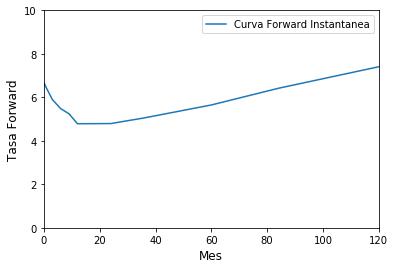

In [14]:
plt.plot(fwd['Vencimiento'],fwd['Tasas Forward'], '-',
                  label="Curva Forward Instantanea")
plt.xlabel("Mes", size=12)
plt.ylabel("Tasa Forward", size=12)
plt.xlim(0,120)
plt.ylim([0,10])
plt.legend()

In [15]:
madurez = [0,1/3,2/31,1,31/30,3,91/30,6,181/30,9,271/30,12,361/30,24,721/30,36,1081/30,60,1801/30,84,2521/30,120]
tasas = [6.665383,6.665383,6.404126,6.404126,5.898738,5.898738,5.479394,5.479394,5.242475,5.242475,
         4.785799,4.785799,4.794019,4.794019,5.055214,5.055214,5.649194,5.649194,6.415734,6.415734,
         7.406222,7.406222]
curva_fwd = pd.DataFrame(list(zip(madurez, tasas)) , columns=["Vencimiento","Tasas Forward"], 
                         index=['']*len(tasas))

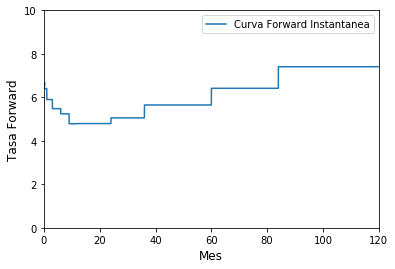

In [17]:
plt.plot(curva_fwd['Vencimiento'],curva_fwd['Tasas Forward'], '-',
                  label="Curva Forward Instantanea")
plt.xlabel("Mes", size=12)
plt.ylabel("Tasa Forward", size=12)
plt.xlim(0,120)
plt.ylim([0,10])
plt.legend()